In [39]:
import numpy as np
import scipy.integrate as scint

def G(A, B, k1, k2, a):
    return a*A - k1*A*B**2 +k2*B**3

def H(A, B, k1, k2, b):
    return k1*A*B**2 -k2*B**3 -b*B

def grayscott1d(y, t, a, b, k1, k2, Da, Db, dx):
    """
    Differential equations for the 1-D Gray-Scott equations.

    The ODEs are derived using the method of lines.
    """
    # The vectors u and v are interleaved in y.  We define
    # views of u and v by slicing y.
    A = y[::2]
    B = y[1::2]

    # dydt is the return value of this function.
    dydt = np.empty_like(y)

    # Just like u and v are views of the interleaved vectors
    # in y, dudt and dvdt are views of the interleaved output
    # vectors in dydt.
    dAdt = dydt[::2]
    dBdt = dydt[1::2]

    # Compute du/dt and dv/dt.  The end points and the interior points
    # are handled separately.
    dAdt[0]    = G(A[0],    B[0],    k1, k2, a) + Da * (-2.0*A[0] + 2.0*A[1]) / dx**2
    dAdt[1:-1] = G(A[1:-1], B[1:-1], k1, k2, a) + Da * np.diff(A,2) / dx**2
    dAdt[-1]   = G(A[-1],   B[-1],   k1, k2, a) + Da * (- 2.0*A[-1] + 2.0*A[-2]) / dx**2
    dBdt[0]    = H(A[0],    B[0],    k1, k2, b) + Db * (-2.0*B[0] + 2.0*B[1]) / dx**2
    dBdt[1:-1] = H(A[1:-1], B[1:-1], k1, k2, b) + Db * np.diff(B,2) / dx**2
    dBdt[-1]   = H(A[-1],   B[-1],   k1, k2, b) + Db * (-2.0*B[-1] + 2.0*B[-2]) / dx**2

    return dydt


rng = np.random.default_rng()

y0 = np.ones(5000)

t = np.linspace(0, 200, 1000)

a = 0.1
b = 0.1
k1 = 7
k2 = 1
Da = 1
Db = 100

dx = 0.025

sol2 = scint.odeint(grayscott1d, y0, t, args=(a, b, k1, k2, Da, Db, dx), ml=2, mu=2)

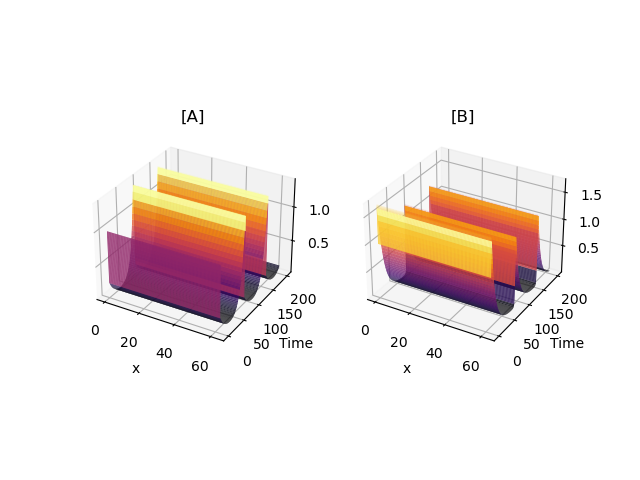

In [67]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

u = sol2[:,::2]
v = sol2[:,1::2]

x = np.arange(0,len(u[0,:])*dx,dx)

X, T = np.meshgrid(x,t)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax2 = fig.add_subplot(1,2,2,projection='3d')

ax1.plot_surface(X,T,u,linewidth=0,cmap=cm.inferno,antialiased=True,ccount=150,rcount=200)
ax2.plot_surface(X,T,v,linewidth=0,cmap=cm.inferno,antialiased=True,ccount=150,rcount=200)

ax1.set_title('[A]')
ax2.set_title('[B]')

ax1.set_xlabel('x')
ax1.set_ylabel('Time')

ax2.set_xlabel('x')
ax2.set_ylabel('Time')

plt.show()

In [73]:
import holoviews as hv
from holoviews import opts

u = sol2[:,::2]
v = sol2[:,1::2]

x = np.arange(0,len(u[0,:])*dx,dx)

X, T = np.meshgrid(x,t)

surface = hv.Surface((x,t, u), label='Surface')

AttributeError: type object 'opts' has no attribute 'Surface'